In [30]:
#Loading preprocessed dataset(I made some changes in the pre-processed data ,I am uploading my preprocessed csv file with pynb
#file, so please upload that pre-processed csv file and test)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import NearestNeighbors
df = pd.read_csv('dataset1_processed.csv')         


In [31]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,stategov,bachelors,nevermarried,admclerical,notinfamily,white,Male,40,unitedstates,<=50K
1,50,selfempnotinc,bachelors,marriedcivspouse,execmanagerial,husband,white,Male,13,unitedstates,<=50K
2,38,private,hsgrad,divorced,handlerscleaners,notinfamily,white,Male,40,unitedstates,<=50K
3,53,private,11th,marriedcivspouse,handlerscleaners,husband,black,Male,40,unitedstates,<=50K
4,28,private,bachelors,marriedcivspouse,profspecialty,wife,black,Female,40,cuba,<=50K


In [32]:
#CONVERTING CATEGORICAL COLUMNS INTO NUMERICAL COLUMNS USOING df_dummies
#REFERENCE - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
dummy = pd.get_dummies(df[['workclass','education','marital-status','occupation','relationship','race','sex','native-country']])
df = pd.concat([df,dummy],axis=1)
df = df.drop(['workclass','education','marital-status','occupation','relationship','race','sex','native-country'],axis = 1) #removing capital-gain and capital-loss columns


In [23]:
df.head()

,age,hours-per-week,salary,workclass_federalgov,workclass_localgov,workclass_private,workclass_selfempinc,workclass_selfempnotinc,workclass_stategov,workclass_withoutpay,...,native-country_portugal,native-country_puertorico,native-country_scotland,native-country_south,native-country_taiwan,native-country_thailand,native-country_trinadad&tobago,native-country_unitedstates,native-country_vietnam,native-country_yugoslavia
0,39,40,<=50K,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,<=50K,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,40,<=50K,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,40,<=50K,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,40,<=50K,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#NORMALIZING THE NUMERICAL COLUMNS
#REFERENCE - https://www.kaggle.com/parasjindal96/how-to-normalize-dataframe-pandas
df["age"]=((df["age"]-df["age"].min())/(df["age"].max()-df["age"].min()))*20
df["hours-per-week"]=((df["hours-per-week"]-df["hours-per-week"].min())/(df["hours-per-week"].max()-df["hours-per-week"].min()))*20

In [34]:
#I have made some changes in the Assignment 1 preprocessed data and loading it here.I have uploaded new preprocessed csv
#file along with this python notebook
# Here for categorical column workclass I have used get_dummies to convert this column into numerical column
#Here for categorical column education I have used get_dummies to convert this column into numerical column 
#Here for categorical column marital-status I have used get_dummies to convert this column into numerical column
#Here for categorical column occupation I have used get_dummies to convert this column into numerical column 
#Here for the categorical column relationship I have used get_dummies to convert this column into numerical column
#Here for the categorical column race I have used get_dummies to convert this column into numerical column 
#Here for categorical column sex I have used get_dummies to convert thos column into numericalo column 
#Here for numerical column Age I have normalized the data in range of 20 using min_max normalization
#Here for the numerical ciolumn Hours-per-week I have normalized the data in the range of 20 using min_max normalization
df.head()

,age,hours-per-week,salary,workclass_federalgov,workclass_localgov,workclass_private,workclass_selfempinc,workclass_selfempnotinc,workclass_stategov,workclass_withoutpay,...,native-country_portugal,native-country_puertorico,native-country_scotland,native-country_south,native-country_taiwan,native-country_thailand,native-country_trinadad&tobago,native-country_unitedstates,native-country_vietnam,native-country_yugoslavia
0,6.027397,7.959184,<=50K,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,9.041096,2.448980,<=50K,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,5.753425,7.959184,<=50K,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,9.863014,7.959184,<=50K,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3.013699,7.959184,<=50K,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#MOVING SALARY INTO ANOTHER DATA FRAME 
df1 = pd.DataFrame(df,columns=['salary'])
df = df.drop(['salary'],axis = 1) #removing capital-gain and capital-loss columns
#REFERENCE - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
label_encoder = preprocessing.LabelEncoder() 
df1['salary']= label_encoder.fit_transform(df1['salary'])#converting salary into numerical values


In [36]:
df.head()


,age,hours-per-week,workclass_federalgov,workclass_localgov,workclass_private,workclass_selfempinc,workclass_selfempnotinc,workclass_stategov,workclass_withoutpay,education_10th,...,native-country_portugal,native-country_puertorico,native-country_scotland,native-country_south,native-country_taiwan,native-country_thailand,native-country_trinadad&tobago,native-country_unitedstates,native-country_vietnam,native-country_yugoslavia
0,6.027397,7.959184,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9.041096,2.448980,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,5.753425,7.959184,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,9.863014,7.959184,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3.013699,7.959184,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df1.shape

(24949, 1)

In [39]:
#SPLITTING DATA INTO TRAINING AND TESTING 
#REFERENCE - https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
X_train, X_test, y_train, y_test = train_test_split( df, df1, test_size=0.3, random_state=1)

In [40]:
#BAGGING ALGORITHM
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),
                          max_samples=0.5, max_features=0.5)
bagging.fit(X_train,np.ravel(y_train,order='C'))
y_pred = bagging.predict(X_test)
y1_pred = bagging.predict(X_train)
print("ACCURACY OF Bagging with validation set :",metrics.accuracy_score(y_test, y_pred))
print("ACCURACY OF Bagging with training set  :",metrics.accuracy_score(y_train, y1_pred))
print('\n')
accuracy_bagging = metrics.accuracy_score(y_test, y_pred)
accuracy_bagging1 = metrics.accuracy_score(y_train, y1_pred)
Bagging_classifier = f1_score(y_test, y_pred,average='macro',labels=np.unique(y_pred))
Bagging_classifier1 = f1_score(y_train, y1_pred,average='macro',labels=np.unique(y1_pred))
print("F1 score of bagging with validation set  :",Bagging_classifier)
print("F1 score of bagging with training set :",Bagging_classifier1)

ACCURACY OF Bagging with validation set : 0.8126920507682031
ACCURACY OF Bagging with training set  : 0.847572148419606


F1 score of bagging with validation set  : 0.7189383391699192
F1 score of bagging with training set : 0.7671847427186613


In [41]:
#KNN
#REFERENCE - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, np.ravel(y_train,order='C'))
y2_pred=neigh.predict(X_test)
y3_pred = neigh.predict(X_train)

print("Accuracy of knn with validation set is  :",metrics.accuracy_score(y_test, y2_pred))
print("ACCURACY OF knn with training set is  :",metrics.accuracy_score(y_train, y3_pred))

accuracy_knn = metrics.accuracy_score(y_test, y2_pred)
accuracy_knn1 = metrics.accuracy_score(y_train, y3_pred)

knn_classifier = f1_score(y_test, y2_pred,average='macro',labels=np.unique(y2_pred))
knn_classifier1 = f1_score(y_train, y3_pred,average='macro',labels=np.unique(y3_pred))

print("F1 score of knn with validation set is :",knn_classifier)
print("F1 score of knn with training  set is :",knn_classifier1)


Accuracy of knn with validation set is  : 0.7925183700734802
ACCURACY OF knn with training set is  : 0.88599404489235
F1 score of knn with validation set is : 0.7244588802309726
F1 score of knn with training  set is : 0.8444792611210806


In [42]:
#Ada Boost
#REFERENCE - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
from sklearn.ensemble import AdaBoostClassifier
clf1 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf1.fit(X_train, np.ravel(y_train,order='C'))
y4_pred=clf1.predict(X_test)
y5_pred = clf1.predict(X_train)

print("Accuracy of adaboost with validation set is :",metrics.accuracy_score(y_test, y4_pred))
print("Accuracy of adaboost with training set is  :",metrics.accuracy_score(y_train, y5_pred))

accuracy_adaboost = metrics.accuracy_score(y_test, y4_pred)
accuracy_adaboost1 = metrics.accuracy_score(y_train, y5_pred)

ada_boost =  f1_score(y_test, y4_pred,average='macro',labels=np.unique(y4_pred))
ada_boost1 =  f1_score(y_train, y5_pred,average='macro',labels=np.unique(y5_pred))

print("F1 score of adaboost with validation set is  :",ada_boost)
print("F1 score of adaboost with training set is  :",ada_boost1)


Accuracy of adaboost with validation set is : 0.8307281229124917
Accuracy of adaboost with training set is  : 0.8364635822262941
F1 score of adaboost with validation set is  : 0.7629672669707814
F1 score of adaboost with training set is  : 0.7657759419903012


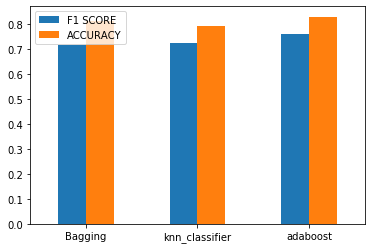

In [43]:
#BAR GRAPH OF F1 SCORE OF THREE CLASSIFIERS FOR VALIDATION SET IS 
#REFERENCE - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
F1SCORE = [Bagging_classifier, knn_classifier,ada_boost]

ACCURACY = [accuracy_bagging,accuracy_knn,accuracy_adaboost]

index = ['Bagging', 'knn_classifier','adaboost']

df3 = pd.DataFrame({'F1 SCORE':F1SCORE,'ACCURACY':ACCURACY}, index=index)

ax = df3.plot.bar(rot=0)

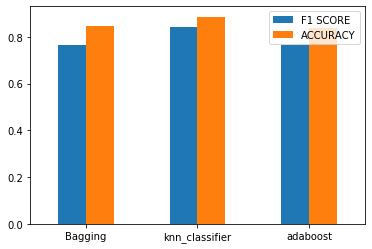

In [44]:
#BAR GRAPH OF F1 SCORE OF THREE CLASSIFIERS FOR TRAINING SET IS 
#REFERENCE - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
F1SCORE1 = [Bagging_classifier1, knn_classifier1,ada_boost1]
ACCURACY1 = [accuracy_bagging1,accuracy_knn1,accuracy_adaboost1]
index1 = ['Bagging', 'knn_classifier','adaboost']
df4 = pd.DataFrame({'F1 SCORE':F1SCORE1,'ACCURACY':ACCURACY1}, index=index)
ax1 = df4.plot.bar(rot=0)

In [ ]:
#Here as we see that accuracy for validation set is highest for ada_boost algorithm which is 83.07% , where as F1 score
#for validation set is highest for Ada_boost algorithm as well with 0.7629.Whereas KNN has the highest accuracy with training 
#set with 88.59 , and F1 score is highest with knn_classifier with 0.84 with training test.


Text(0.5, 0, 'N_ESTIMATORS')

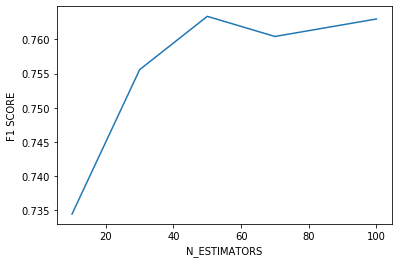

In [46]:
#PLOTTING LINE CHART WITH CHANGING n_estimators 
#REFERENCE - https://howtothink.readthedocs.io/en/latest/PvL_H.html
list1 = [10,30,50,70,100]
list2 = []
for i in list1:
    from sklearn.ensemble import AdaBoostClassifier
    clf2 = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=i, random_state=0)
    clf2.fit(X_train, np.ravel(y_train,order='C'))
    y2_pred=clf2.predict(X_test)
    value= f1_score(y_test, y2_pred,average='macro',labels=np.unique(y2_pred))
    list2.append(value)
import matplotlib.pyplot as plt
plt.plot([10,30,50,70,100], [list2[0], list2[1], list2[2],list2[3],list2[4]])
plt.ylabel('F1 SCORE')
plt.xlabel('N_ESTIMATORS')
#I have used n_estimators as changing parameter on validation_set and shown this line graph ,how the n_estimators value is effecting F1 score
#of Ada_boost algorithm.

In [ ]:
#I have choosen AdaBoost classifier , because this classifier is part of ensemble machine learning approach.
#Ensemble learning is a model which combines series of low performing classifiers for creating an improved classifier.
#In this classifier the  individual classifier and final predication label are retured which have maximum votes.
#Ensemble learning can decrease bias using bagging approach
#Boosting classifier is less affected by overfitting problem
#AdaBoost clasifier combines poorly performed classifier to produce strong and high accuracy classifier.
#I have got best accuracy score of 76.29 with Adaboost on validation set
#I have got highest F1 score with adaboost , 0.7671 AFTER tunning the parameters with validation set 
#For this reasons I have choosen Adaboost algorithm

In [103]:
#BEST F1 SCORE ATTAINED WITH BOOSTING :
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier() 

clf2 = AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=10,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                                                         splitter='best'),
                   learning_rate=1.0, n_estimators=100, random_state=None)
clf2.fit(X_train, np.ravel(y_train,order='C'))
y2_pred=clf2.predict(X_test)
value= f1_score(y_test, y2_pred,average='macro',labels=np.unique(y2_pred))
print("The best F1 score attained after tunning parameters on validation set is  ")
print(value)



The best F1 score attained after tunning parameters on validation set is  
0.7671040150159443


In [62]:
#STEPS TAKEN TO ACHIEVE BEST RESULT
#1..Diving training data into 70 % and test data into 30 % , so that ample amount of  data will be avalaible for training 
#the classifier as well as testing the classifier.
#2.Tuning the hyperparameters : 
#Here we used method know as grid_search where I tested with different parameters
#code is given below , so after running grid search with different parameters , I have tunned the ada_boost classifier with 
#those parameters to reach the maximun best F1 score possible.

In [104]:
#GRID SEARCH WITH DIFFERENT PARAMETERS USING ADA_BOOST CLASSIFIER
#REFERENCE  - https://github.com/scikit-learn/scikit-learn/issues/4949
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X,y = make_classification(n_samples=1000)

params = {'base_estimator__max_depth':[1,100],
          "n_estimators": [100,200,300],
          'base_estimator':[DecisionTreeClassifier(max_features=2), 
                            DecisionTreeClassifier(max_features=10)]}
gs = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), params)
gs.fit(X,y)
print(gs.best_estimator_)

C:\Users\vishnu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=2,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                                

In [107]:
#STEPS TO CLEAN THE TEST DATA
df = pd.read_csv('test.csv')         #loading test data set 
df = df.drop(['capital-gain','capital-loss','education-num','fnlwgt'],axis = 1) #removing capital-gain and capital-loss columns
df['age'] = df.age.abs()   #changing negative values of age to postive values
df = df.replace('?',np.nan) #replacing "?" with null
df = df.replace(0,np.nan)       #replacing  with null

mean = df['age'].mean()
df['age'].fillna(mean, inplace=True)      #replacing null values in age with mean values

df = df.dropna() #droping colums which are null


df['education'] = df['education'].str.replace('-', '')
df['education'] = df.education.str.lower()

df['marital-status'] = df['marital-status'].str.replace('-', '')
df['marital-status'] = df['marital-status'].str.lower()

df['relationship'] = df['relationship'].str.replace('-', '')
df['relationship'] = df['relationship'].str.lower()

df['race'] = df['race'].str.replace('-', '')
df['race'] = df['race'].str.lower()

df['native-country'] = df['native-country'].str.replace('-', '')
df['native-country'] = df['native-country'].str.lower()

#cleaning the 'occupation' attribute:
df['occupation'] = df.occupation.str.lower()
df['occupation'] = df.occupation.str.replace(' ','')
df['occupation'] = df['occupation'].str.replace('-', '')
vals_to_replace = {'execmanagerial': 'Exec-managerial','xecmanagerial': 'Exec-managerial', 'eecmanageria': 'Exec-managerial',  'execmanageial': 'Exec-managerial', 'execmangerial': 'Exec-managerial','execmanageril': 'Exec-managerial','eecmanagerial': 'Exec-managerial','execmnagerial': 'Exec-managerial', 'execmanagrial': 'Exec-managerial','execmaagerial': 'Exec-managerial','excmanagerial': 'Exec-managerial','execanagerial': 'Exec-managerial','exemanagerial': 'Exec-managerial','execmanageral': 'Exec-managerial',  'execmanaerial': 'Exec-managerial','execmanageria': 'Exec-managerial','execmagerial': 'Exec-managerial','dmclrical': 'Adm-clerical',  'dmclerical': 'Adm-clerical','admclerical': 'Adm-clerical','amclerical': 'Adm-clerical','adclerical': 'Adm-clerical','admclerica': 'Adm-clerical',  'admcleical': 'Adm-clerical','admclerial': 'Adm-clerical','admclrical': 'Adm-clerical', 'admclericl': 'Adm-clerical','admcerical': 'Adm-clerical','admlerical':       'Adm-clerical','admclercal': 'Adm-clerical','admcleicl': 'Adm-clerical', 'dmclericl': 'Adm-clerical','handlerscleaners': 'Handlers-cleaners','handlersleaners': 'Handlers-cleaners', 'handlercleaners': 'Handlers-cleaners','handerscleaners': 'Handlers-cleaners','handlescleaners': 'Handlers-cleaners','hndlerscleaners': 'Handlers-cleaners','handlerscleaers': 'Handlers-cleaners', 'handlerscleanes': 'Handlers-cleaners','handlerscleners': 'Handlers-cleaners','hadlerscleaners': 'Handlers-cleaners', 'hanlerscleaners': 'Handlers-cleaners', 'handlrscleaners': 'Handlers-cleaners','handlerscleanrs': 'Handlers-cleaners', 'andlerscleaners': 'Handlers-cleaners','handlerscleaner': 'Handlers-cleaners','handlersceaners': 'Handlers-cleaners',  'handlersleanes': 'Handlers-cleaners','handlersclaners': 'Handlers-cleaners', 'handlercleanes': 'Handlers-cleaners', 'profspecialty': 'Prof-specialty','profspecilty': 'Prof-specialty','profspcialty': 'Prof-specialty','profspeciaty': 'Prof-specialty','profspecialy': 'Prof-specialty','profspecalty': 'Prof-specialty','prfspecialty': 'Prof-specialty','profspecialt': 'Prof-specialty','rofspecialty': 'Prof-specialty', 'profpecialty': 'Prof-specialty','profsecialty': 'Prof-specialty','prospecialty': 'Prof-specialty','profspeialty': 'Prof-specialty','prfspecialy': 'Prof-specialty','rofspecalty': 'Prof-specialty', 'pofspecialty': 'Prof-specialty', 'propecialty': 'Prof-specialty','otherservice':' Other-service',  'oterservice':' Other-service',  'therservice':' Other-service',  'oherservce':' Other-service', 'otherrvice':' Other-service','othersevice':' Other-service', 'otheservice':' Other-service','othersrvice':' Other-service','othrervice':' Other-service', 'otherserice':' Other-service','othrservice':' Other-service','oherservice':' Other-service',  'otherservce':' Other-service','otherservie':' Other-service','otherervice':' Other-service','otherservic':' Other-service','othersrvic':' Other-service','privhuseserv': 'Priv-house-serv', 'prvhouseserv': 'Priv-house-serv', 'privhousesrv': 'Priv-house-serv', 'privhouseerv': 'Priv-house-serv',  'privhousesev': 'Priv-house-serv', 'privouseserv': 'Priv-house-serv',  'privhouseserv': 'Priv-house-serv', 'protectieserv': 'Priv-house-serv','protctiveserv': 'Protective-serv','protectveserv': 'Protective-serv', 'protetiveserv': 'Protective-serv','protectivesev': 'Protective-serv', 'proteciveserv': 'Protective-serv','protectiveser': 'Protective-serv','potectiveserv': 'Protective-serv','rotectiveserv': 'Protective-serv','protectivesrv': 'Protective-serv','sales':' Sales', 'ales':' Sales','sal':' Sales','sals':' Sales','sale':' Sales','saes':' Sales', 'sles':' Sales','armedforces':'Armed-Forces' ,'armedfrces':'Armed-Forces','transportmoving': 'Transport-moving', 'ransportmoving': 'Transport-moving',  'tranportmoving': 'Transport-moving','transortmoving': 'Transport-moving','transpormoving': 'Transport-moving', 'trans': 'Transport-moving','trasportmoving': 'Transport-moving','transportmving': 'Transport-moving', 'portmoing': 'Transport-moving', 'transportoving': 'Transport-moving', 'transpotmoving': 'Transport-moving', 'transprtmoving': 'Transport-moving',  'ranspormoving': 'Transport-moving', 'transportmovig': 'Transport-moving', 'tansportmoving': 'Transport-moving','transportmovin': 'Transport-moving','transportmovng': 'Transport-moving', 'trnsportmoving': 'Transport-moving','farmingfishing': 'Farming-fishing','farmingfishng': 'Farming-fishing', 'armingfishing': 'Farming-fishing', 'famingfishing': 'Farming-fishing','frmingfishing': 'Farming-fishing','farmingfising': 'Farming-fishing',  'farminfishing': 'Farming-fishing', 'farmngfishing': 'Farming-fishing','faringfishing': 'Farming-fishing','farmingfishin': 'Farming-fishing', 'farmingishing': 'Farming-fishing','farmingfihing': 'Farming-fishing', 'farmingfshing': 'Farming-fishing','faringfishng': 'Farming-fishing','farmigfishing': 'Farming-fishing','farmingfishig': 'Farming-fishing','machineopnspct':'Machine-op-inspct',  'machineopinspct':'Machine-op-inspct', 'macineopinspct':'Machine-op-inspct','machi':'Machine-op-inspct' ,'machineopinspt':'Machine-op-inspct','mahineopinspct':'Machine-op-inspct', 'nopinspct':'Machine-op-inspct','mchineopinspct':'Machine-op-inspct',  'machneopinsct':'Machine-op-inspct', 'machineopispct':'Machine-op-inspct','machieopinspct':'Machine-op-inspct', 'machinepinspct':'Machine-op-inspct',  'machineopinsct':'Machine-op-inspct', 'machineopinpct':'Machine-op-inspct', 'machineopinspc':'Machine-op-inspct','achineopinspct':'Machine-op-inspct', 'machineoinspct':'Machine-op-inspct','machieopnspct':'Machine-op-inspct','machneopinspct':'Machine-op-inspct', 'crftrepair':' Craft-repair','craftrepair' :'Craft-repair', 'craftrepir':'Craft-repair',  'raftrepair':'Craft-repair',   'craftrepai':'Craft-repair','craftepair':'Craft-repair','caftrepair':'Craft-repair', 'craftrepar':'Craft-repair', 'cratrepair':'Craft-repair',  'craftreair':'Craft-repair', 'craftrpair':'Craft-repair',  'crafrepair':'Craft-repair', 'cafrepair':'Craft-repair','craftreir':'Craft-repair','techsuppor':'Tech-support',  'techsupport':'Tech-support',   'techspport':'Tech-support',  'techsuport':'Tech-support', 'echsupport':'Tech-support', 'techupport':'Tech-support',  'tchsupport':'Tech-support', 'tecsupport':'Tech-support',  'techsuppot':'Tech-support',  'techsupprt':'Tech-support', 'tehsupport':'Tech-support', 'protectiveserv':' Protective-serv', 'protectivserv':' Protective-serv', 'prtectiveserv':' Protective-serv' }
df['occupation'] = df['occupation'].map(vals_to_replace)
df = df.dropna()
df['occupation'].replace({' Craft-repair' : 'Craft-repair',' Protective-serv' : 'Protective-serv',' Sales':'Sales',' Other-service':'Otherservice'},inplace = True)
df['occupation'] = df.occupation.str.lower()
df['occupation'] = df['occupation'].str.replace('-', '')


#CLEANING WORKCLASS ATTRIBUTE
df['workclass'] = df['workclass'].str.replace('-', '')
df['workclass'] = df.workclass.str.lower()
df['workclass'] = df.workclass.str.replace(' ','')
df['workclass'].replace({'selfempnotnc' : ' Self-emp-not-inc','selfempnc' : ' Self-emp-not-inc','selfempotinc' : ' Self-emp-not-inc',
                        'selfempotic' : ' Self-emp-not-inc','selfempotnc' : ' Self-emp-not-inc'},inplace = True)
df['workclass'].replace({' Self-emp-not-inc' : 'selfempnotinc'},inplace = True)


df['age'] = df['age'].astype(int)

In [109]:
df.shape

(15060, 10)

In [110]:
dummy = pd.get_dummies(df[['workclass','education','marital-status','occupation','relationship','race','sex','native-country']])
df = pd.concat([df,dummy],axis=1)
df = df.drop(['workclass','education','marital-status','occupation','relationship','race','sex','native-country'],axis = 1) #removing capital-gain and capital-loss columns



#NORMALIZING THE DATA
df["age"]=((df["age"]-df["age"].min())/(df["age"].max()-df["age"].min()))*20
df["hours-per-week"]=((df["hours-per-week"]-df["hours-per-week"].min())/(df["hours-per-week"].max()-df["hours-per-week"].min()))*20

In [111]:
df.head()

,age,hours-per-week,workclass_federalgov,workclass_localgov,workclass_private,workclass_selfempinc,workclass_selfempnotinc,workclass_stategov,workclass_withoutpay,education_10th,...,native-country_portugal,native-country_puertorico,native-country_scotland,native-country_south,native-country_taiwan,native-country_thailand,native-country_trinadad&tobago,native-country_unitedstates,native-country_vietnam,native-country_yugoslavia
0,0.0,7.959184,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.0,4.897959,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,3.877551,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.0,7.959184,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,3.877551,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [112]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier() 

clf5 = AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=10,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                                                         splitter='best'),
                   learning_rate=1.0, n_estimators=100, random_state=None)
clf5.fit(X_train, np.ravel(y_train,order='C'))

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=10,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

In [113]:
X_test = df

In [114]:
X_test.shape

(15060, 99)

In [115]:
y_pred5=clf5.predict(X_test)


In [121]:
df4 = pd.DataFrame(y_pred5,columns = ['salary'])

In [128]:
 df4['salary'].replace({0:'<=50k',1:'>50k'},inplace = True)


In [129]:
df4['salary'].value_counts()

<=50k    11922
>50k      3138
Name: salary, dtype: int64

In [130]:
df4.to_csv('B00834806_predication1.csv',index=False)
